Welcome to our heart disease analysis programme!
During the course of this programme you will be asked to provide some information in order to determine the likelihood that you have a heart disease.
This may seem all gloomy but we promise to make your experience as fun as possible :D
We will start by showing you the dataset we've used and then go into the actual analysis.

Are you ready to start (Yes/No)? 
Yes

Great, have fun!

What type of information would you like to see about our dataset?
Please enter a number:
1 = age related info/graphs;
2 = gender related info/graphs;
3 = chest pain related info/graphs;
4 = Continue to heart disease analysis
4

Toodeloo kangeroo! And enjoy the heart disease analysis :)

In this part we are going to evaluate your risk of having a heart disease. We also want to clarify that our estimate serves solely as indication. We still advise you to see a professional close to you when experiencing symptoms. We are going to suggest you some experts close in 

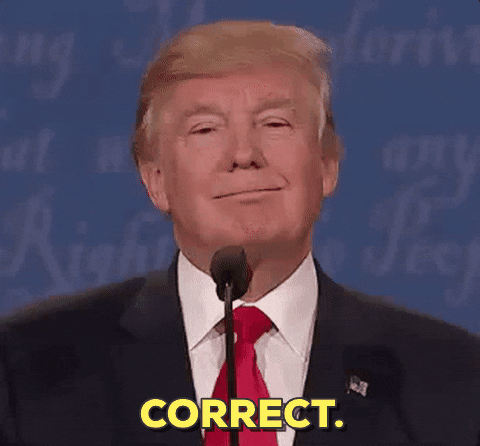


To find the best hospital near you, please enter the two-letter abbreviation of the state you currently live in.
You can check your state's abbreviation here: https://abbreviations.yourdictionary.com/articles/state-abbrev.html

Your state's abbreviation: 
LA

Overall, there are 121 hospitals in your state (LA).
However, we only want to show you the hospitals with the best rankings. 

These five hospitals are the highest-ranked (from 1 to 5; 5 being the best) in your state:



,Hospital overall rating,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Hospital Type,Emergency Services
0,5,WILLIS KNIGHTON BOSSIER HEALTH CENTER,2400 HOSPITAL DR,BOSSIER CITY,71111,BOSSIER,3182127000,Acute Care Hospitals,True
1,4,HEART HOSPITAL OF LAFAYETTE,1105 KALISTE SALOOM ROAD,LAFAYETTE,70508,LAFAYETTE,3375211000,Acute Care Hospitals,True
2,4,THIBODAUX REGIONAL MEDICAL CENTER,602 N ACADIA ROAD,THIBODAUX,70301,LAFOURCHE,9854475500,Acute Care Hospitals,True
3,4,LADY OF THE SEA GENERAL HOSPITAL,200 WEST 134TH PLACE,CUT OFF,70345,LAFOURCHE,9856326401,Critical Access Hospitals,True
4,4,WEST CALCASIEU CAMERON HOSPITAL,701 EAST CYPRESS STREET,SULPHUR,70663,CALCASIEU,3375277034,Acute Care Hospitals,True



Good luck and drive safely to your hospital-of-choice!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import math
from IPython.display import Image
from IPython.display import YouTubeVideo
%matplotlib inline


url_heart = "https://raw.githubusercontent.com/CodyCoHSG/Hospitals/master/heart_disease.csv"
url_hospitals = "https://raw.githubusercontent.com/CodyCoHSG/Hospitals/master/HospInfo.csv"


# This class is used to change font types/colors.
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


# INTRODUCTION TO PROJECT

while True:
    q0 = input(color.BOLD + "Welcome to our heart disease analysis programme!" + color.END + "\nDuring the course of this programme you will be asked to provide some information in order to determine the likelihood that you have a heart disease.\nThis may seem all gloomy but we promise to make your experience as fun as possible :D\nWe will start by showing you the dataset we've used and then go into the actual analysis.\n\nAre you ready to start (Yes/No)? \n").lower()
    if q0 == "no":
        print("\nAlright, that is understandable. Take a few deep breaths and try again")
        while True:
            q01 = input("\nAre you ready to start now (Yes/No)?\n").lower()
            if q01 == "no":
                print("\nAlright, that is understandable. Take a few deep breaths and try again")
            elif q01 == "yes":
                print(color.CYAN + color.BOLD + "\nGreat, have fun!\n" + color.END)
                break
            else:
                print(color.RED + "\nPlease answer by either typing in \"Yes\" or \"No\"." + color.END)
        break
    elif q0 == "yes":
        print(color.CYAN + color.BOLD + "\nGreat, have fun!\n" + color.END)
        break
    else:
        print(color.RED + "\nPlease answer by either typing in \"Yes\" or \"No\"." + color.END)
        while True:
            q01 = input("\nAre you ready to start now (Yes/No)?\n").lower()
            if q01 == "no":
                print("\nAlright, that is understandable. Take a few deep breaths and try again")
            elif q01 == "yes":
                print(color.CYAN + color.BOLD + "\nGreat, have fun!\n" + color.END)
                break
            else:
                print(color.RED + "\nPlease answer by either typing in \"Yes\" or \"No\"." + color.END)
        break


# DATA VISUALIZATION

patient_data = pd.read_csv(url_heart)

#data cleaning: we are dropping all of these inputs to keep it simple and renaming the others to make the table understandable
#the remaining factors will be used during the analysis and may also be part of the user input 
patient_data = patient_data.drop(["fbs", "restecg", "oldpeak", "slope", "ca", "thal"], axis=1)
patient_data.columns = ["age", "sex", "chest pain", "resting BP", "cholestoral", "max HR", "exercise pain", "heart disease"]
patient_data["sex"].replace(0, "female", inplace=True)
patient_data["sex"].replace(1, "male", inplace=True)

#data preparation for the age section, creating ranges for the age analysis
thirty_fourty = patient_data[(patient_data.age>30)&(patient_data.age<=40)]
fourty_fifty = patient_data[(patient_data.age>40)&(patient_data.age<=50)]
fifty_sixty = patient_data[(patient_data.age>50)&(patient_data.age<=60)]
sixty_seventy = patient_data[(patient_data.age>60)&(patient_data.age<=70)]
seventy_eighty = patient_data[(patient_data.age>70)&(patient_data.age<=80)]
#defining the length of each age group
threefour = len(thirty_fourty)
fourfive = len(fourty_fifty)
fivesix = len(fifty_sixty)
sixseven = len(sixty_seventy)
seveneight= len(seventy_eighty)


#start of graphic display programme, ask user which type of data he/she would like to see
while True:
            q1 = input(color.BOLD + "What type of information would you like to see about our dataset?" + color.END + "\nPlease enter a number:\n1 = age related info/graphs;\n2 = gender related info/graphs;\n3 = chest pain related info/graphs;\n4 = Continue to heart disease analysis\n")
            if q1 == "1":
                print(color.RED + "\nPlease keep in mind that the result may be distorted due to the limited dataset." + color.END)
                print(color.BOLD + "\nAge related info and graphs" + color.END)
                print("\nAge distribution in dataset:")
                print("30 to 40 years old : %s" % threefour)
                print("40 to 50 years old : %s" % fourfive)
                print("50 to 60 years old : %s" % fivesix)
                print("60 to 70 years old : %s" % sixseven)
                print("70 to 80 years old : %s" % seveneight) 
                
                #show age groups in bar charts
                sns.barplot(x=['30-40','40-50','50-60', "60-70", "70-80"],
                y=[threefour, fourfive, fivesix, sixseven, seveneight])
                plt.xlabel('Age Range')
                plt.ylabel('Age Counts')
                plt.title('Size of age ranges in dataset')
                plt.show()

                #create age bins
                age_bin = [30,40,50,60,70,80]
                patient_data['age_group']=pd.cut(patient_data['age'], bins=age_bin)

                # % of heart disease for each age group
                agegroup_data = patient_data.groupby('age_group').sum()[['heart disease']]
                agegroup_data.reset_index(level=0, inplace=True)

                #create list of number of patients in each age group to add to the agegroup_data as a new column
                patients_group = [threefour, fourfive, fivesix, sixseven, seveneight]
                agegroup_data["patients"]= patients_group

                #create a pie chart 30-40yrs
                #first define the number of healthy/sick people in the age group by locating them in agegroup_data. 0 is the first row in that datatable and that is where the 30-40yr are located
                disease_0 = agegroup_data.loc[0, "heart disease"]
                healthy_0 = int(agegroup_data.loc[0, "patients"]) - int(agegroup_data.loc[0, "heart disease"])
                #put these in a list called proportions
                proportions = [disease_0, healthy_0]
                #create the pie chart and define how it will look, i.e how far the two parts of the pie are apart from one another = explode 
                plt.pie(proportions, labels = ['Sick', 'Healthy'], 
                    shadow = False,
                    colors = ['orange','forestgreen'],
                    explode = (0.05 , 0),
                    startangle = 90,
                    autopct = '%1.1f%%')
                #view the plot drop above
                plt.axis('equal')
                #set label
                plt.title("Heart disease for 30-40 year olds")
                #view the chart
                plt.tight_layout()
                plt.show()

                #Create a pie chart 40-50yrs. Same procedure as above, row 1 is now the next age group, 40-50
                disease_1 = agegroup_data.loc[1, "heart disease"]
                healthy_1 = int(agegroup_data.loc[1, "patients"]) - int(agegroup_data.loc[1, "heart disease"])
                proportions = [disease_1, healthy_1]
                plt.pie(proportions, labels = ['Sick', 'Healthy'], 
                    shadow = False,
                    colors = ['orange','forestgreen'],
                    explode = (0.05 , 0),
                    startangle = 90,
                    autopct = '%1.1f%%')
                plt.axis('equal')
                plt.title("Heart disease for 40-50 year olds")
                plt.tight_layout()
                plt.show()

                #Create a pie chart 50-60yrs
                disease_2 = agegroup_data.loc[2, "heart disease"]
                healthy_2 = int(agegroup_data.loc[2, "patients"]) - int(agegroup_data.loc[2, "heart disease"])
                proportions = [disease_2, healthy_2]
                plt.pie(proportions, labels = ['Sick', 'Healthy'], 
                    shadow = False,
                    colors = ['orange','forestgreen'],
                    explode = (0.05 , 0),
                    startangle = 90,
                    autopct = '%1.1f%%')
                plt.axis('equal')
                plt.title("Heart disease for 50-60 year olds")
                plt.tight_layout()
                plt.show()

                # Create a pie chart 60-70yrs
                disease_3 = agegroup_data.loc[3, "heart disease"]
                healthy_3 = int(agegroup_data.loc[3, "patients"]) - int(agegroup_data.loc[3, "heart disease"])
                proportions = [disease_3, healthy_3]
                plt.pie(proportions, labels = ['Sick', 'Healthy'], 
                    shadow = False,
                    colors = ['orange','forestgreen'],
                    explode = (0.05 , 0),
                    startangle = 90,
                    autopct = '%1.1f%%')
                plt.axis('equal')
                plt.title("Heart disease for 60-70 year olds")
                plt.tight_layout()
                plt.show()

                # Create a pie chart 70-80yrs
                disease_4 = agegroup_data.loc[4, "heart disease"]
                healthy_4 = int(agegroup_data.loc[4, "patients"]) - int(agegroup_data.loc[4, "heart disease"])
                proportions = [disease_4, healthy_4]
                plt.pie(proportions, labels = ['Sick', 'Healthy'], 
                    shadow = False,
                    colors = ['orange','forestgreen'],
                    explode = (0.05 , 0),
                    startangle = 90,
                    autopct = '%1.1f%%')
                plt.axis('equal')
                plt.title("Heart disease for 70-80 year olds")
                plt.tight_layout()
                plt.show()

            elif q1 == "2":
                print(color.BOLD + "\nGender related info and graphs:" + color.END)
                #count total, male and female in dataset
                #count healthy/sick male and female
                total_count=len(patient_data.sex)
                male_count=len(patient_data[patient_data["sex"]=="male"])
                female_count=len(patient_data[patient_data["sex"]=="female"])
                male_sick = len(patient_data[(patient_data.sex=="male") & (patient_data["heart disease"]==1)])
                male_healthy = len(patient_data[(patient_data.sex=="male") & (patient_data["heart disease"]==0)])
                female_sick = len(patient_data[(patient_data.sex=="female") & (patient_data["heart disease"]==1)])
                female_healthy = len(patient_data[(patient_data.sex=="female") & (patient_data["heart disease"]==0)])
                print("total number of people in data set is: %s" %total_count)
                print("male: %s" % male_count)
                print("female: %s" % female_count)
                print("healthy men: %s" % male_healthy)
                print("healthy women: %s" % female_healthy)
                print("men with heart disease: %s" % male_sick)
                print("women with heart disease: %s" % female_sick)
                
                #graphic description of gender distribution in dataset
                plt.figure(figsize=(5,6))
                sns.countplot(patient_data.sex)
                plt.show()
                
                #pie chart men. Same procedure as with the age pie charts
                proportions = [male_sick, male_healthy]
                plt.pie(proportions, labels = ['Sick', 'Healthy'], 
                    shadow = False,
                    colors = ['orange','forestgreen'],
                    explode = (0.05 , 0),
                    startangle = 90,
                    autopct = '%1.1f%%')
                plt.axis('equal')
                plt.title("Men diagnosed with heart disease")
                plt.tight_layout()
                plt.show()
                
                #pie chart women:
                proportions = [female_sick, female_healthy]
                plt.pie(proportions, labels = ['Sick', 'Healthy'], 
                    shadow = False,
                    colors = ['orange','forestgreen'],
                    explode = (0.05 , 0),
                    startangle = 90,
                    autopct = '%1.1f%%')
                plt.axis('equal')
                plt.title("Women diagnosed with heart disease")
                plt.tight_layout()
                plt.show()
                
            elif q1 == "3":
                print(color.BOLD + "\nChest pain related info and graphs:" + color.END)
                
                #heart disease and exercise induced pain
                print("\nheart disease and exercise induced pain")
                plt.figure(figsize=(10,5))
                sns.countplot(x="exercise pain", data=patient_data, hue="heart disease", palette="plasma")
                plt.show()

                #heart disease and chest pain
                print("Different levels of chest pain (1=no pain, 3=strong pain) and heart disease")
                plt.figure(figsize=(10,5))
                sns.countplot(x="chest pain", data=patient_data, hue="heart disease", palette="plasma")
                plt.show()
                
                print("\nWhilst excercised induced chest pain does not seem to be a reliable indicator for heart disease, the different levels of chest pain paint a clearer picture\n")
            
            elif q1 == "4":
                print(color.CYAN + color.BOLD + "\nToodeloo kangeroo! And enjoy the heart disease analysis :)\n" + color.END)
                break
            else:
                print(color.RED + "\nPlease answer by either typing in \"1\" \"2\" \"3\" or \"4\"." + color.END)


# HEART DISEASE ASSESSMENT

# Disclaimer and Intro
print ("In this part we are going to evaluate your risk of having a heart disease. We also want to clarify that our estimate serves solely as indication. We still advise you to see a professional close to you when experiencing symptoms. We are going to suggest you some experts close in the end of the presentation. Now some funky calculation is going on, please do not get a heart attack before receiving the results. \n")

# Change string to numerical input for regression
patient_data["sex"].replace("female", 0, inplace=True)
patient_data["sex"].replace("male", 1, inplace=True)

# Setting dependent and independent varibles
x= sm.add_constant(patient_data[["age", "sex", "exercise pain", "chest pain"]])
y= patient_data[["heart disease"]]

# Computing the regression
model = sm.Logit(y, x)
result = model.fit()
result.summary()

# Extracting coefficients for user estimate
coef= result.params
agecoef = coef['age']
sexcoef = coef ['sex']
exercoef = coef ['exercise pain']
chestcoef = coef ['chest pain']
const= coef['const']

#testing the coefficient
#inage = 40
#insex = 0
#inexercise = 1
#inpain = 1

# Asking for user input

while True:
    try:
        inage = int(input("Please let us know your age, we keep it confidential :) : \n"))
        if (inage <= 120 and inage>0):
            break
        else:
            print(color.RED + "\nPlease let us know your \"real\" age!\n" + color.END)
    except ValueError:
            print(color.RED + "\nPlease enter your age as a number in years.\n" + color.END)

while True:
    try:
        insex = int(input("Thanks, your data is collected. Please let us know your sex as well. (0 = female, 1 = male) : \n"))
        if (insex == 0 or insex == 1):
            break
        else:
            print(color.RED + "\nPlease enter 0 or 1.\n" + color.END)
    except ValueError:
            print(color.RED + "\nPlease enter a number (0 or 1).\n" + color.END)

while True:
    try:
        inexercise = int(input("Do you feel pain when you do sports (0 = I do not feel pain while exercising, 1 = I feel pain while exercising):\n"))
        if (inexercise == 0 or inexercise == 1):
            break
        else:
            print(color.RED + "\nPlease enter 0 or 1.\n" + color.END)
    except ValueError:
            print(color.RED + "\nPlease enter a number (0 or 1).\n" + color.END)        

while True:
    try:
        inpain = int(input("We are almost there bear with us it is about your life. Do you feel chest pain in daily activities? Do not worry, we keep your data confidential (0 = no pain, 1 = not very painful, 2 = moderate pain, 3 = strong pain): \n"))
        if (inpain == 0 or inpain == 1 or inpain == 2 or inpain == 3):
            break
        else:
            print(color.RED + "\nPlease enter 0, 1, 2 or 3.\n" + color.END)
    except ValueError:
            print(color.RED + "\nPlease enter a number (0, 1, 2, or 3).\n" + color.END)     


# Computing user probabilty of heart disease
z = (agecoef*inage + sexcoef*insex + exercoef*inexercise + chestcoef * inpain + const)
decimal = (1/(1+math.exp(-z)))
percentage = "{:.2%}".format(decimal)

# Showing final result
print ("Thanks for your input, we sold it to a data base and made some money with it. Just kidding. Nevertheless, we have news for you: Your likelyhood to have a heart disease is \n")
if decimal > 0.5:
    print(color.RED + percentage + color.END)
else:
    print (color.GREEN + percentage + color.END)

    
# HOSPITAL RECOMMENDATION

# The lines below read the csv file and clean it by dropping unnecessary columns.
hospitals=pd.read_csv(url_hospitals, index_col ="State")
hospitals.drop(hospitals.columns[13:29], axis=1, inplace=True)
hospitals.drop(["Provider ID", "Hospital Ownership", "Meets criteria for meaningful use of EHRs"], axis=1, inplace=True)

# In a first step, we ask the user if she/he is still feeling OK after the heart disease analysis.
user_still_ok=input("\nWe hope we did not scare you too much with these findings. Are you still OK (Yes/No)?\n").lower()

if user_still_ok=="yes":
    print("\nAwesome, that's very good to hear!")

elif user_still_ok=="no":
    print("\nOh no! To cheer you up, here's a funny cat video: ")
    display(YouTubeVideo('WEkSYw3o5is'))
    print("We're sure that helps.")

# If user enters wrong input, she/he is asked again. This time, with a shorter phrase ("Are you still OK?").
else:
    print(color.RED + "\nPlease answer by either typing in \"Yes\" or \"No\"." + color.END)
    
    # This while loop is repeated until the user enters the correct input.
    while True:
        user_really_ok=input("\nAre you still OK (Yes/No)?\n").lower()
        if user_really_ok=="yes":
            print("\nAwesome, that's very good to hear!")
            break
        elif user_really_ok=="no":
            print("\nOh no! To cheer you up, here's a funny cat video: ")
            display(YouTubeVideo('WEkSYw3o5is'))
            print("We're sure that helps.")
            break
        else:
            print(color.RED + "\nPlease answer by either typing in \"Yes\" or \"No\"." + color.END)


# A short statement to lighten the mood and highlight to the userwhat the next steps are.
print("\nAs your medical condition is close to our " + color.BOLD + color.RED + "hearts" + color.END + " (pun intended), we will now recommend you the best possible hospitals near you.")


# This while loop asks for user's country until correct input is entered (and prints answer - including a gif).
while True:
    user_country=input("\nDo you live in the United States of America (Yes/No)? \n").lower() 
    
    if user_country=="yes":
        print("\nGood for you! Your country is - according to some - being made great again!")
        Trump=Image('https://media.giphy.com/media/26tknCqiJrBQG6bxC/giphy.gif')
        display(Trump)
        break
    
    # If the user does not live in the U.S., she/he is asked to move. The user can only continue once moved.
    elif user_country=="no":
        print("\nWhat a pity. Please move to the USA so we can provide you with hospital recommendations. To facilitate the process, here's the application link for a U.S. Green Card: https://www.uscis.gov/greencard")
        while True:
            moved = input("\nHave you moved (Yes/No)? \n").lower()
            if moved == "no":
                print("\nPlease do so as soon as possible - we will be waiting.")
            elif moved == "yes":
                print("\nGreat! Welcome to the USA!")
                break
            else:
                print(color.RED + "\nPlease answer by either typing in \"Yes\" or \"No\"." + color.END)
        break
    
    else:
        print(color.RED + "\nPlease answer by either typing in \"Yes\" or \"No\"." + color.END)


# The following part asks for the user's state abbreviation and provides a website to find it.
print("\nTo find the best hospital near you, please enter the two-letter abbreviation of the state you currently live in.")
print("You can check your state's abbreviation here: https://abbreviations.yourdictionary.com/articles/state-abbrev.html")

# This while loop asks the user to enter the state abbreviation until she/he enters one.
while True:
    
    # The user's state abbreviation is used to access the specific hospital data of that state (using .loc).
    try:
        user_state=input("\nYour state's abbreviation: \n").upper()
        user_state_hospitals = hospitals.loc[user_state]
        break
    
    except KeyError:
        print(color.RED + "\nUnfortunately, you did not enter a valid state abbreviation, please try again." + color.END)


# These two lines print the amount of hospitals in the user's state and display the next steps
print("\nOverall, there are " + str(len(user_state_hospitals.index)) + " hospitals in your state (" + user_state + ").")
print("However, we only want to show you the hospitals with the best rankings. \n\nThese five hospitals are the highest-ranked (from 1 to 5; 5 being the best) in your state:\n")


# The following part cleans the dataset for the purpose of displaying the best 5 hospitals in the user's state
# Any unnecessary/unavailable data is dropped, values are sorted, and a new index is set
# Then, the column displaying the Hospital overall rating is highlighted green
best_hospitals=user_state_hospitals.set_index('Hospital overall rating')
best_hospitals.drop("Hospital overall rating footnote", axis=1, inplace=True)
best_hospitals=best_hospitals.drop("Not Available", axis=0)
best_hospitals=best_hospitals.sort_values(by="Hospital overall rating", ascending=False)
best_hospitals=best_hospitals.reset_index()
display(best_hospitals.head().style.apply(lambda x: ['background: #b1db57' if x.name == "Hospital overall rating" else '' for i in x]))


# This line prints a final statement to the user after having showed the best hospitals in her/his state
print(color.BOLD + color.GREEN + "\nGood luck and drive safely to your hospital-of-choice!" + color.END)
